# Project:
Predict movie reviews and create a reommender system.


## Team Members

<a id= "cont"></a>
## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statment</a>

<a href=#three>3. Import Python Modules</a>

<a href=#four>4. Reading the Data</a>

<a href=#five>5. Exploratory Data Analysis</a>

<a href=#six>6. Data Visualization</a>

<a href=#seven>7. Data Preprocessing</a>

<a href=#eight>8. Model Builing</a>

<a href=#nine>9. Model Evaluation</a>



<a id= "one"></a>
## 1. Introduction
<a href= #cont>Back to table of contents</a>


<a id= "two"></a>
# 2. Problem Statment
<a href= #cont>Back to table of contents</a>

### Start Comet.ml Experiment.
This is to ensure version control for the machine learning models.


In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="yeeIKreBkd61jeuRdNjFOeSFr",
    project_name="general",
    workspace="henre7860",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/henre7860/general/d891fccb9ec14f48b38de53d23c7398f



<a id= "three"></a>
## 3. Import Python Modules
<a href= #cont>Back to table of contents</a>

In order to effectivaly manipulate the data we need the right tools for the job. Below we will import the neccesary modules that we will be using to interact with the data.

In [1]:
# Import packages

# Data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Packages to create models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from surprise import Reader, Dataset, SVD, accuracy
from sklearn.metrics.pairwise import cosine_similarity

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

<a id= "four"></a>
## 4. Reading the Data
<a href= #cont>Back to table of contents</a>

discription


In [2]:
# Import Datasets

# Import the csv files
ratings = pd.read_csv("data/train.csv")   # Import the csv file
#genome_scores = pd.read_csv("data/genome_scores.csv")
#genome_tags = pd.read_csv("data/genome_tags.csv")
imdb_data = pd.read_csv("data/imdb_data.csv")
#links = pd.read_csv("data/links.csv")
movies = pd.read_csv("data/movies.csv")
tags = pd.read_csv("data/tags.csv")

# Diplay whole column.
pd.set_option('display.max_column', None)   # Diplay whole column.
pd.set_option('display.max_row', None)

# Use only genre to create a simple structure for the model, more features can be added later.


<a id= "five"></a>
## 5. Exploratory Data Analysis
<a href= #cont>Back to table of contents</a>

With Data Analysis, we will look at the following:

#### Top 5 Records of the Data


In [5]:
# Sample of the train dataset.
ratings.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [6]:
# Sample of the movie dataset.
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Shape of the Data

In [7]:
# Display the shape of the data
print("ratings:", ratings.shape)
print("movies: ", movies.shape)

ratings: (10000038, 4)
movies:  (62423, 3)


#### Columns/features in the data

In [8]:
# Display the column headings of the dataset
print("ratings : ", ratings.columns,end="\n\n")
print("movies : ", movies.columns,end="\n\n")


ratings :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

movies :  Index(['movieId', 'title', 'genres'], dtype='object')



#### Data Information


In [9]:
# Information of the train dataset.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [10]:
# Information of the movie dataset.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


#### Check for Null values

In [12]:
ratings.isnull().sum()   # Chech null values for each column

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
movies.isnull().sum()   # Chech null values for each column

movieId    0
title      0
genres     0
dtype: int64

deiscuss null values

#### Lenth of unique Features

In [14]:
# Number of unique Users in train dataset
ratings['userId'].nunique()

162541

In [15]:
# Number of unique movies in train dataset
ratings['movieId'].nunique()

48213

In [16]:
# Number of unique Ratings in train dataset
ratings['rating'].nunique()

10

In [17]:
# Number of unique movies in movie dataset
movies['movieId'].nunique()

62423

### Observations

There are a total of 48,213 Movies in the train dataset with 162,541 unique Users providing a total of 10,000,038 Rating based on 10 unique Ratings.

- userId: Unique Id provided for each User
- movieId: Unique Id provided for each Movie
- Only movies with at least one rating or tag are included in the dataset.
- rating: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- genres: 
-- Action
-- Adventure
-- Animation
-- Children’s
-- Comedy
-- Crime
-- Documentary
-- Drama
-- Fantasy
-- Film-Noir
-- Horror
-- Musical
-- Mystery
-- Romance
-- Sci-Fi
-- Thriller
-- War
-- Western
-- (no genres listed)


<a id= "six"></a>
## 6. Data Visualization
<a href= #cont>Back to table of contents</a>

Here we will be plotting the distributions of the dataset in different ways.

#### Movie Count per Year
From the movies dataset the year will be extracted from the title column, this will be plotted to see which year has the highest number of movie releases.

In [18]:
movies_copy = movies.copy()    # Create a copy of movies dataset

# Extract the year from title column.
movies_copy['year'] = movies_copy['title'].str.extract('.*\((.*)\).*',expand = False)


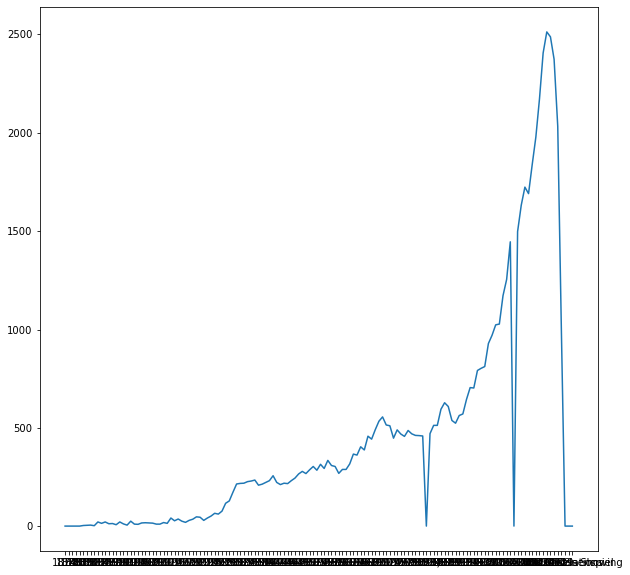

In [28]:
# Plot the graph of number of movies release per year.

plt.figure(figsize=(10,10))
plt.plot(movies_copy.groupby('year')['title'].count())
plt.show()


In [29]:
# Find the year that released the max number of movies.

movies_per_year = movies_copy.groupby('year')['title'].count()

print(movies_per_year[movies_per_year == movies_per_year.max()])
movies_per_year.describe()

year
2015    2513
Name: title, dtype: int64


count     140.000000
mean      442.971429
std       576.979794
min         1.000000
25%        26.000000
50%       267.000000
75%       517.250000
max      2513.000000
Name: title, dtype: float64

The max of 2513 movies was released in the year 2015. We can also see that the average movies released per year is 442 movies.

#### Movie Count per Genre

First we will extract individual genres from the genre colunm. Each genre name will be in a separate column with a value of '1' if the movie has the genre and a value of '0' if not.

In [30]:
# Seperate the genres in the genre column
movies_copy

genre_list = []

for row in range(len(movies_copy['genres'])):   # Iterate row by row
    for genre in movies_copy['genres'][row].split('|'):   # Iterate genre by genre
        if genre not in genre_list:    # Exclude genre if it is already in the genre_list
            genre_list.append(genre)    # Add the genre to the genre_list

print('Genre Names:\n\n', genre_list)
print('\nNumber of genres:', len(genre_list))

Genre Names:

 ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']

Number of genres: 20


In [31]:
# Create a column for each genre

for genre in genre_list:
    movies_copy[genre] = 0
    
for i in range(len(movies_copy.genres)):
    for x in movies_copy.genres[i].split('|'):
        movies_copy[x][i]=1

In [32]:
movies_copy.head()   # Sample of the movies dataset to confirm the new genre coulumns

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next we will create a dictionary of the movie count per genre.

In [33]:
genre_dict ={}

for i in movies_copy.columns[4:]:
    genre_dict[i]=movies_copy[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,genre_dict[i]))

Adventure    				4145
Animation    				2929
Children    				2935
Comedy    				16870
Fantasy    				2731
Romance    				7719
Drama    				25606
Action    				7348
Crime    				5319
Thriller    				8654
Horror    				5989
Mystery    				2925
Sci-Fi    				3595
IMAX    				195
Documentary    				5605
War    				1874
Musical    				1054
Western    				1399
Film-Noir    				353
(no genres listed)    				5062


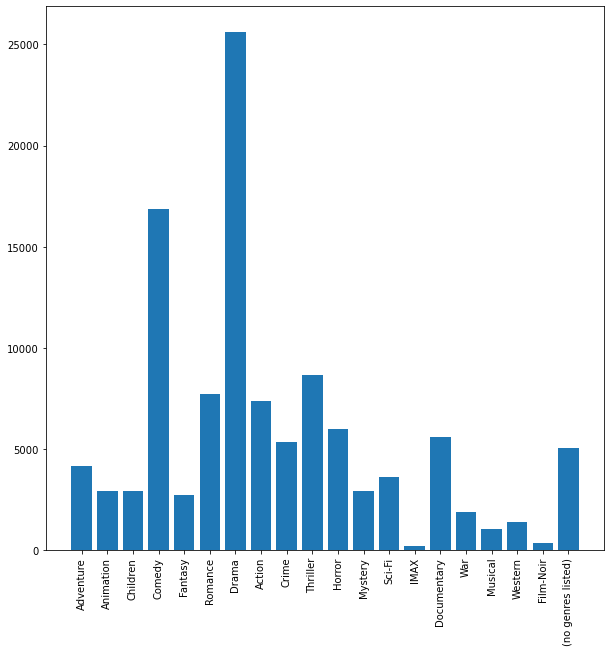

In [34]:
# Plot Movie count per Genre
plt.figure(figsize=(10,10))
plt.bar(height = genre_dict.values(), x = genre_dict.keys())
plt.xticks(rotation=90)
plt.show()

From the graph we can see that the genre 'Drama' is the most common genre for the movies in the dataset with 25606 movies followed by comedy with 16870 movies.

<a id= "seven"></a>
## 7. Data Preprocessing
<a href= #cont>Back to table of contents</a>

Small description

list what you want to do by processing this data


### Preprocessing: train dataset

The timestamp column from the train dataset does not contribute to much so it will be dropped.

In [3]:
ratings.drop('timestamp',axis=1, inplace= True)   # drop timestamp column

In [4]:
# Sample new dataset
ratings.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [5]:
ratings.to_csv("data/train_2.csv", index = False)

The new data set works and it will be saved as "train_2.csv" to be used again in a later stage. 

### Preprocessing: movies dataset

If we look at a sample of the movies dataset below we can see that the title column has two variable; movie title and release year. The two variable will be split into individual colunms, because the title of a movie and the release year can be important for the predictive model. 

The genre column has a similar problem as all genre categories for a movie is grouped in a single cell, we will be splitting these genre into individual genre columns and assigning a numeric values to the genres.A value of 1 means the movie falls into this genre and a value of 0 means the the movie does not fall into this genre.

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### "title" column Split

In [4]:
# Sample of the title column
movies['title'].head() 

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [5]:
# Extract the year from title column.
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [6]:
# Look at a sample of the new dataset to confirm the code works correctly
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
# check for null values
movies.isnull().sum()

movieId      0
title        0
genres       0
year       407
dtype: int64

As we can see there are 407 movies where the date is unknown, but we cannot drop these rows because we might need to reference these movies in the future.

In [8]:
# Check unique year value

movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959',
       '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946',
       '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938',
       '1935', '1936', '1926', '1932', '1985', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', 'Das Millionenspiel', '1913',
       '2011', '1898', '1899', '1894', '2012', '1910', '2013', '1983)',
       

We expect all year value to be numeric, but as can be seen above not all the values qualify, the data in the rows will be replaced by 0 to identify rows with no year value.

In [9]:
# Replace incorrect year data with np.nan
movies.replace(to_replace = 'Das Millionenspiel',value= 0, inplace= True)
movies.replace(to_replace = 'Your Past Is Showing',value= 0, inplace= True)
movies.replace(to_replace = 'Close Relations',value= 0, inplace= True)
movies.replace(to_replace = '2006–2007',value= 0, inplace= True)
movies.replace(to_replace = "1983)",value= 0, inplace= True)
movies.replace(to_replace = "nan",value= 0, inplace= True)
movies.replace(to_replace = np.nan,value= 0, inplace= True)

In [10]:
# Check unique year value to ensure incorrect values was replace

movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959',
       '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946',
       '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938',
       '1935', '1936', '1926', '1932', '1985', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', 0, '1913', '2011', '1898', '1899',
       '1894', '2012', '1910', '2013', '1896', '2014', '2015', '1895',
   

In [11]:
# Convert all the year column values to numeric

movies['year'] = pd.to_numeric(movies['year'])

In [12]:
# Check if convirsion was succesful
movies['year'].dtype

dtype('int64')

In [16]:
# Drop title column
movies.drop('title', axis=1, inplace= True)

Every movie has a unique Id for each movie title,thus the title column containing the movie name can be dropped, because it is redundant. Replace any other values in the year column that does not satisfy year values. Convert all values in the year column to numeric.

#### "genre" column Split

In [18]:
movies['genres'].head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [19]:
genre_list = []    # Create an empty list

for row in range(len(movies['genres'])):   # Iterate row by row though genre column
    for genre in movies['genres'][row].split('|'):   # Iterate genre by genre and split genres
        if genre not in genre_list:    # Exclude genre if it is already in the genre_list
            genre_list.append(genre)    # Add the genre to the genre_list


            
# Create a column for each genre

for genre in genre_list:   # Iterate through genre_list
    movies[genre] = 0    # Assign 0 to all genre columns
    
for i in range(len(movies['genres'])):    # iterate through genres
    for x in movies['genres'][i].split('|'):    # Split the genres column bby genre
        movies[x][i]=1    # Assign 1 if genre included

In [22]:
# The column genres serves no more purpose and will be dropped
movies.drop('genres', inplace= True, axis=1)

In [23]:
movies.head()

,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Save new dataset to csv
movies.to_csv('data/movies_2.csv', index = False)

In this section the genre column containing all the genre that a movie has is in one cell, thus the genre column was split into individual genres and the original genre column was dropped. 
We can see from the sample of the movies dataset that the features are more suitable for a machine learning model. This new dataset will be saved as "movies_2" to be used at a later stage.

### Preprocessing: imdb_data dataset

In [3]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


First we will merge the movie database with the imbd_data to create a dataset more information then we will process the datda.

In [4]:
# import movies data
movies = pd.read_csv('data/movies_2.csv')

In [5]:
# Merge movies data and imdb_data

movies_imdb = movies.merge(imdb_data, how = 'left', on= 'movieId')

In [6]:
movies_imdb.head()

,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),title_cast,director,runtime,budget,plot_keywords
0,1,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
movies_imdb.nunique()

movieId               62423
year                    136
Adventure                 2
Animation                 2
Children                  2
Comedy                    2
Fantasy                   2
Romance                   2
Drama                     2
Action                    2
Crime                     2
Thriller                  2
Horror                    2
Mystery                   2
Sci-Fi                    2
IMAX                      2
Documentary               2
War                       2
Musical                   2
Western                   2
Film-Noir                 2
(no genres listed)        2
title_cast            15161
director              10493
runtime                 257
budget                 1277
plot_keywords         14246
dtype: int64

In [8]:
len(movies_imdb)

62423

In [9]:
movies_imdb.isna().sum()

movieId                   0
year                      0
Adventure                 0
Animation                 0
Children                  0
Comedy                    0
Fantasy                   0
Romance                   0
Drama                     0
Action                    0
Crime                     0
Thriller                  0
Horror                    0
Mystery                   0
Sci-Fi                    0
IMAX                      0
Documentary               0
War                       0
Musical                   0
Western                   0
Film-Noir                 0
(no genres listed)        0
title_cast            47222
director              47076
runtime               48902
budget                55140
plot_keywords         48039
dtype: int64

#### Encode "director" column

In [10]:

print("Number of nunique Directores:", movies_imdb['director'].nunique())

print("Number of null values:", movies_imdb['director'].isna().sum())

Number of nunique Directores: 10493
Number of null values: 47076


In [11]:
movies_imdb['director'] = movies_imdb['director'].fillna(0)

In [12]:
movies_imdb['director'] = movies_imdb['director'].astype('string')

In [13]:
# Enconde "director" column to five each director a unique id with a numeric dtype

le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(movies_imdb['director'])

# removing the column 'Purchased' from df
# as it is of no use now.
#df.drop("Purchased", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
movies_imdb["directorId"] = label

In [14]:
# Check sum of unique values to ensure to amount is correct

movies_imdb["directorId"].nunique()

10494

In [15]:
# Drop the "director" column as it is of no further use
movies_imdb.drop('director', axis=1, inplace= True)

In [16]:
movies_imdb.head()

,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),title_cast,runtime,budget,plot_keywords,directorId
0,1,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,4849
1,2,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,104.0,"$65,000,000",board game|adventurer|fight|game,5010
2,3,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,101.0,"$25,000,000",boat|lake|neighbor|rivalry,6375
3,4,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Whitney Houston|Angela Bassett|Loretta Devine|...,124.0,"$16,000,000",black american|husband wife relationship|betra...,9576
4,5,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,227


A numeric directorId column was created

#### Encode title_cast column

In [17]:
movies_imdb_2 = movies_imdb.copy()

In [18]:
movies_imdb_2['title_cast'].head()

0    Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1    Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2    Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...
3    Whitney Houston|Angela Bassett|Loretta Devine|...
4    Steve Martin|Diane Keaton|Martin Short|Kimberl...
Name: title_cast, dtype: object

In [19]:
print("Number of nunique title_cast:", movies_imdb_2['title_cast'].nunique())

print("Number of null values:", movies_imdb_2['title_cast'].isna().sum())

Number of nunique title_cast: 15161
Number of null values: 47222


In [20]:
movies_imdb['title_cast'] = movies_imdb_2['title_cast'].fillna(0)

In [21]:
movies_imdb['title_cast'] = movies_imdb_2['title_cast'].astype('string')

In [23]:
# Enconde "title_cast" column to give each title_cast a unique id with a numeric dtype

le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(movies_imdb_2['title_cast'])

# Appending the array to our dataFrame
# with column name 'Purchased'
movies_imdb_2["title_castId"] = label

In [24]:
# Drop title_cast column

movies_imdb_2.drop('title_cast', axis=1, inplace= True)

In [25]:
movies_imdb_2.head()

,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),runtime,budget,plot_keywords,directorId,title_castId
0,1,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,4849,14135
1,2,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104.0,"$65,000,000",board game|adventurer|fight|game,5010,12197
2,3,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101.0,"$25,000,000",boat|lake|neighbor|rivalry,6375,14685
3,4,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,124.0,"$16,000,000",black american|husband wife relationship|betra...,9576,14760
4,5,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,227,13471


#### Encode plot_keywords

In [35]:
movies_imdb_3 = movies_imdb_2.copy()

In [36]:
print("Number of nunique plot_keywords:", movies_imdb_3['plot_keywords'].nunique())

print("Number of null values:", movies_imdb_3['plot_keywords'].isna().sum())

Number of nunique plot_keywords: 14246
Number of null values: 48039


In [37]:
movies_imdb_3['plot_keywords'] = movies_imdb_3['plot_keywords'].fillna(0)

In [38]:
movies_imdb_3['plot_keywords'] = movies_imdb_3['plot_keywords'].astype('string')

In [39]:
movies_imdb_3['plot_keywords'].isna().sum()

0

In [40]:
# Enconde "director" column to five each director a unique id with a numeric dtype

le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(movies_imdb_3['plot_keywords'])

# removing the column 'Purchased' from df
# as it is of no use now.
#df.drop("Purchased", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
movies_imdb_3["plot_keywordsId"] = label

In [41]:
# Drop title_cast column

movies_imdb_3.drop('plot_keywords', axis=1, inplace= True)

In [42]:
movies_imdb_3.head()

,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),runtime,budget,directorId,title_castId,plot_keywordsId
0,1,1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,"$30,000,000",4849,14135,12882
1,2,1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104.0,"$65,000,000",5010,12197,1625
2,3,1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101.0,"$25,000,000",6375,14685,1629
3,4,1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,124.0,"$16,000,000",9576,14760,1509
4,5,1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,"$30,000,000",227,13471,4484


#### Process "runtime" column

In [44]:
movies_imdb_4 = movies_imdb_3.copy()

In [45]:
movies_imdb_4['runtime'].isna().sum()

48902

In [46]:
mean_runtime=movies_imdb_4['runtime'].mean()
movies_imdb_4['runtime'] = movies_imdb_4['runtime'].fillna(value=mean_runtime)

In [47]:
movies_imdb_4['runtime'].isna().sum()

0

Fill all the null values in the "runtime" column with the mean


#### Process "budget" column

In [50]:
movies_imdb_5 = movies_imdb_4.copy()

In [54]:
movies_imdb_5['budget'].isna().sum()

55140

In [56]:
movies_imdb_5['budget'].unique()

array(['$30,000,000', '$65,000,000', '$25,000,000', ..., 'DKK35,000,000',
       'EUR90,000', 'DEM5,800,000'], dtype=object)

# Drop budget for NOW

In [57]:
movies_imdb_5.drop('budget', axis=1, inplace= True)

In [58]:
movies_imdb_5.isna().sum()

movieId               0
year                  0
Adventure             0
Animation             0
Children              0
Comedy                0
Fantasy               0
Romance               0
Drama                 0
Action                0
Crime                 0
Thriller              0
Horror                0
Mystery               0
Sci-Fi                0
IMAX                  0
Documentary           0
War                   0
Musical               0
Western               0
Film-Noir             0
(no genres listed)    0
runtime               0
directorId            0
title_castId          0
plot_keywordsId       0
dtype: int64

In [62]:
movies_imdb_5.to_csv('movies_imdb_df.csv', index = False)

### Preprocessing: tags dataset

In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [17]:
imbd_test = imdb_data[['movieId', 'directorId']]

In [18]:
imbd_test.head()

,movieId,directorId
0,1,5462
1,2,5642
2,3,7180
3,4,10768
4,5,245


### Merge Review dataset

In order to train a model we need a single complete dataset, so here will merge the train and movie datasets on "movieId". 


In [63]:
# Import updated datasets for ratings and genres

ratings_2 = pd.read_csv("data/train_2.csv")
movies_imdb_df = pd.read_csv('movies_imdb_df.csv')


In [65]:
print(len(ratings_2))
print(len(movies_imdb_df))

10000038
62423


In [68]:
# Merge datasets

train_df = ratings_2.merge(movies_imdb_df, how = 'inner', on= 'movieId')


In [71]:
print("Lenth of ratings_2:",len(ratings_2))
print("Lenth of movies_2:",len(movies_imdb_df))

print("nUnique of userId:",ratings_2['userId'].nunique())
print("nUnique of movieId:",movies_imdb_df['movieId'].nunique())

Lenth of ratings_2: 10000038
Lenth of movies_2: 62423
nUnique of userId: 162541
nUnique of movieId: 62423


In [72]:
print("Lenth of train_df:",len(train_df))

Lenth of train_df: 10000038


We can see the length of the merged dataset train_df is the same as the ratings_2 dataset that we merged on. Thus we can assume the merge was succesfull.

In [73]:
# Look at a sample of the new dataset
train_df.head()

,userId,movieId,rating,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),runtime,directorId,title_castId,plot_keywordsId
0,5163,57669,4.0,2008,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,107.0,6432,3988,3877
1,87388,57669,3.5,2008,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,107.0,6432,3988,3877
2,137050,57669,4.0,2008,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,107.0,6432,3988,3877
3,120490,57669,4.5,2008,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,107.0,6432,3988,3877
4,50616,57669,4.5,2008,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,107.0,6432,3988,3877


In [75]:
# Save new dataset to .csv
train_df.to_csv('train_df_merge.csv', index = False)

We can see the merging of the dataset is succesful, we now have one complete dataset in order to train the models. We will save this merged dataset to csv to use later.


# Additional processing if any

<a id= "eight"></a>
## 8. Model Building
<a href= #cont>Back to table of contents</a>

In this section we will build multiple models in order to find the most accurate model, the accuracy of the model will be measured by the Root Mean Squared Error(RMSE). Now to build the model we split the dataset into a training and testing datasets(testing size=20% of the actual data and use random_state = 42). To actually fit the model, we call the model.fit function and supply it the training input and output.

### Train and Test Sets

The training dataset will be used to train a model and the testing set will be used to test how accurate the model is in classifying unseen data.

First the training dataset will be imported, next the features and targets will be identified and seperated and lastly the data will be split into training data and testing date.

(<strong>Attention:</strong> if you are running all the code on your local machine, then it is advised to restart the notebook kernel at this point to free up memory. The saved dataset will be imported below.)

In [2]:
# Import training data set

train_df = pd.read_csv('train_df_merge.csv')

In [5]:
train_df.head()

,userId,movieId,rating,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Documentary,War,Musical,Western,Film-Noir,(no genres listed),runtime,directorId,title_castId,plot_keywordsId
0,5163,57669,4.0,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,107.0,6432,3988,3877
1,87388,57669,3.5,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,107.0,6432,3988,3877
2,137050,57669,4.0,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,107.0,6432,3988,3877
3,120490,57669,4.5,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,107.0,6432,3988,3877
4,50616,57669,4.5,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,107.0,6432,3988,3877


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   movieId             int64  
 2   rating              float64
 3   year                int64  
 4   Adventure           int64  
 5   Animation           int64  
 6   Children            int64  
 7   Comedy              int64  
 8   Fantasy             int64  
 9   Romance             int64  
 10  Drama               int64  
 11  Action              int64  
 12  Crime               int64  
 13  Thriller            int64  
 14  Horror              int64  
 15  Mystery             int64  
 16  Sci-Fi              int64  
 17  IMAX                int64  
 18  Documentary         int64  
 19  War                 int64  
 20  Musical             int64  
 21  Western             int64  
 22  Film-Noir           int64  
 23  (no genres listed)  int64  
 24  runtime             fl

In [5]:
# Sort the dataset on userId so similar userId values will be included
train_df = train_df.sort_values('userId')

In [7]:
# Tale a sample of the dataset to train and test on
train_df_sample = train_df[:100000]

In [11]:
train_df_sample.to_csv('train_df_sample.csv', index = False)

In [10]:
train_df_sample = pd.read_csv('train_df_sample.csv')

In [4]:
train_df_sample.head()

,userId,movieId,rating,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Documentary,War,Musical,Western,Film-Noir,(no genres listed),runtime,directorId,title_castId,plot_keywordsId
0,1,7939,2.5,1961,0,0,0,0,0,0,...,0,0,0,0,0,0,101.366615,0,15161,0
1,1,7323,3.5,2003,0,0,0,1,0,0,...,0,0,0,0,0,0,121.000000,971,3057,2853
2,1,7940,4.5,1958,0,0,0,0,0,0,...,0,0,0,0,0,0,101.366615,0,15161,0
3,1,7937,3.0,1963,0,0,0,0,0,0,...,0,0,0,0,0,0,101.366615,0,15161,0
4,1,8154,5.0,1960,0,0,0,0,0,0,...,0,0,0,0,0,0,101.366615,0,15161,0


In [22]:
train_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100000 non-null  int64  
 1   movieId             100000 non-null  int64  
 2   rating              100000 non-null  float64
 3   year                100000 non-null  int64  
 4   Adventure           100000 non-null  int64  
 5   Animation           100000 non-null  int64  
 6   Children            100000 non-null  int64  
 7   Comedy              100000 non-null  int64  
 8   Fantasy             100000 non-null  int64  
 9   Romance             100000 non-null  int64  
 10  Drama               100000 non-null  int64  
 11  Action              100000 non-null  int64  
 12  Crime               100000 non-null  int64  
 13  Thriller            100000 non-null  int64  
 14  Horror              100000 non-null  int64  
 15  Mystery             100000 non-null

In [11]:
# Identify features and target

# Features
X = train_df_sample.drop(['movieId','rating', 'runtime', 'directorId','title_castId', 'plot_keywordsId'], axis=1)

# Target
y = train_df_sample['rating']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 42)


In [4]:
X.columns

Index(['userId', 'year', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [10]:
len(X)

10000038

In [3]:
import time

### Model Training and Prediction

Below multiple models will be created and trained to create a prediction. Then model accuracy will be determined by the RMSE, we are aiming for a RMSE of less than 0.85.

In [16]:
from sklearn.model_selection import GridSearchCV

#### Model 1: Linear Regression

small description

In [33]:
# Best params
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(model,parameters, cv=5)

grid.fit(X_train, y_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [9]:
# Initialize model
lin_reg = LinearRegression()

start = time.time()
# Fit the model
lin_reg.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {round(stop - start,2)}s")
#Create Predition
y_pred_1 = lin_reg.predict(X_test)

# Determine RMSE
RMSE_1 = np.sqrt(mean_squared_error(y_test,y_pred_1))

print('RMSE:', RMSE_1)

#RMSE: 1.04244

# train 1 RMSE: 1.037293

# train 2 RMSE: 1.0420004



Training time: 0.12s
RMSE: 1.037293458590914


#### Model 2 : RandomForestRegressor

In [19]:
rfc = RandomForestRegressor(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [6]:
# Initialize model
forest = RandomForestRegressor(n_estimators=500,criterion= 'mse',max_depth= 8, max_features= 'auto',random_state=42)

# Fit the model
forest.fit(X_train, y_train)

#Create Predition
y_pred_2 = forest.predict(X_test)

# Determine RMSE
RMSE_2 = np.sqrt(mean_squared_error(y_test,y_pred_2))

print('RMSE:', RMSE_2)

#RMSE: 0.954035

# pt RMSE: 0.951329

# train1 RMSE: 1.01160


# train 2 RMSE: 1.02163



RMSE: 1.0116034464320918


#### Model 3: Lasso

In [7]:
# Initialize model
lasso_reg = Lasso()

# Fit the model
lasso_reg.fit(X_train, y_train)

#Create Predition
y_pred_3 = lasso_reg.predict(X_test)

# Determine RMSE
RMSE_3 = np.sqrt(mean_squared_error(y_test,y_pred_3))

print('RMSE:', RMSE_3)

# train 1 RMSE: 1.04962

# train 2 RMSE: 1.05634



RMSE: 1.0496201785492494


#### Model 4: LassoCV

In [8]:
# Initialize model
lassoCV_reg = LassoCV()

# Fit the model
lassoCV_reg.fit(X_train, y_train)

#Create Predition
y_pred_4 = lassoCV_reg.predict(X_test)

# Determine RMSE
RMSE_4 = np.sqrt(mean_squared_error(y_test,y_pred_4))

print('RMSE:', RMSE_4)

# train 1 RMSE: 1.04862

# train 2 RMSE: 1.048695



RMSE: 1.048628368417489


In [11]:

# Initialize model
xgb_reg = XGBRegressor()

start = time.time()
# Fit the model
xgb_reg.fit(X_train, y_train)

#Create Predition
y_pred_5 = xgb_reg.predict(X_test)

stop = time.time()
print(f"Training time: {round(stop - start,2)}s")

# Determine RMSE
RMSE_5 = np.sqrt(mean_squared_error(y_test,y_pred_5))

print('RMSE:', RMSE_5)

# train 1 RMSE: 0.920934

# train 2 RMSE: 0.9241365

#Index(['userId', 'year', 'Adventure', 'Animation', 'Children', 'Comedy',
#       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
#       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western',
#       'Film-Noir', '(no genres listed)']


COMET WARNING: You must install graphviz to plot tree


Training time: 962.2s
RMSE: 0.9977666103882105


In [12]:
# Pickle xgb mode

pickle.dump(xgb_reg, open('xgb_reg.pkl','wb'))

In [6]:
# Loading model to compare the results
xgb_reg = pickle.load(open('xgb_reg.pkl','rb'))

In [13]:
y_pred_5 = xgb_reg.predict(X_test)
RMSE_5 = np.sqrt(mean_squared_error(y_test,y_pred_5))

print('RMSE:', RMSE_5)

RMSE: 0.9956341684445161


<a id= "nine"></a>
## 9. Model Evaluation
<a href= #cont>Back to table of contents</a>

In [10]:
eval_dict = {
    "Model": ['LinearRegression', 'RandomForestRegressor', 'Lasso', 'LassoCV', 'XGBRegressor'],
    "RMSE": [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5]
}

eval_df = pd.DataFrame(eval_dict)
eval_df.sort_values('RMSE',ascending=True)  

,Model,RMSE
4,XGBRegressor,0.920935
1,RandomForestRegressor,1.011603
0,LinearRegression,1.037293
3,LassoCV,1.048628
2,Lasso,1.049620


 <a id="ten"></a>
## 10. Kaggle submition
<a href=#cont>Back to Table of Contents</a>

Below we will do the preprocessing and prediction on our Kaggel test data and save the submission to a csv file. For more information about this competition please visit [Kaggle](https://www.kaggle.com/c/202122-climate-change-belief-analysis/overview).

In [13]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [13]:
samp = pd.read_csv('data/sample_submission.csv')

In [45]:
samp.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [38]:
#Import data

test = pd.read_csv('data/test.csv')
movies_imdb_df = pd.read_csv('movies_imdb_df.csv')

# Merge datasets
test_df = test.merge(movies_imdb_df, how = 'left', on= 'movieId')

In [30]:
test_df = test_df.sort_values('userId')

In [47]:
cols = ['userId', 'movieId']
test_df['Id'] = test_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [48]:
test_df.head()

,userId,movieId,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,War,Musical,Western,Film-Noir,(no genres listed),runtime,directorId,title_castId,plot_keywordsId,Id
0,1,2011,1989,1,0,0,1,0,0,0,...,0,0,0,0,0,101.366615,0,15161,0,1_2011
1,1,4144,2000,0,0,0,0,0,1,1,...,0,0,0,0,0,98.000000,5324,9022,394,1_4144
2,1,5767,1981,0,0,0,1,0,0,0,...,0,0,0,0,0,101.366615,0,15161,0,1_5767
3,1,6711,2003,0,0,0,1,0,1,1,...,0,0,0,0,0,102.000000,9097,12797,8917,1_6711
4,1,7318,2004,0,0,0,0,0,0,1,...,0,0,0,0,0,127.000000,939,6673,12050,1_7318


In [49]:


# Identify feature columns
test_col = test_df[['userId', 'year', 'Adventure', 'Animation', 'Children',
                   'Comedy','Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
                   'Thriller', 'Horror','Mystery', 'Sci-Fi', 'IMAX', 'Documentary',
                   'War', 'Musical', 'Western','Film-Noir', '(no genres listed)']]


# lin_reg
# forest
# xgb_reg


y_pred = xgb_reg.predict(test_col)
test_df['rating'] = y_pred

# Create Id column
#cols = ['userId', 'movieId']
#test_df['Id'] = test_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

submit_df = test_df[['Id', 'rating']]

#submit_df.to_csv('kaggel_sub/xgb_reg_sub.csv', index = False)

In [51]:
submit_df.to_csv('kaggel_sub/xgb_reg_sub.csv', index = False)

## 11 Recomender systems

Recommender System is basically a system that takes the user’s choice as input and predicts all the related movies, or news, books, etc.

you would have seen Recommender System in Action while Scrolling on Youtube, Netflix, etc.

### 11.1 Content Based Filtering

Content-based filtering This type of Filtering system recommends you on the basis of what you actually like. Imagine you love to watch comedy movies so a content-based recommender system will recommend you other related comedy movies which belong to your category

Steps Involved

- Step 1. Getting the Dataset

- Step 2. Data Processing Function

- Step 3. Model Builing Funaction

- Step 4. Testing and Validation



In [ ]:
# Import data

movies = pd.read_csv('data/movies.csv')


#### Data Processing Function

We will create a function below to process the data in the movies dataset.

Processing Steps:
- Isolate the genres column
- Split the values in the genres columns on "|"
- Create a corpus of genres and join then with a space
- Call the count vectorizer function
- fit and transform the words in the genre_corpus

The function will retun an array of numeric data that will be used to create movie recommendations.

In [ ]:
def content_data_processing(df):
    
    genres = df['genres']
    genres = [genre.split("|") for genre in genres]
    df['genre_corpus']= genres
    df['genre_corpus'] = df.genre_corpus.apply(lambda x:" ".join(x))
    cvect = CountVectorizer() 
    vectors = cvect.fit_transform(df['genre_corpus']).toarray()
    #print(vectors.shape)
    return vectors

#### Function to recommend Movies

Below we will create the model to recommend movies with Content Based Filtering. Our model should be capable of finding similarities between movies based on ther genres.

This recommender model take three movie titles as inpunt and then predicts the top n similar movies.

To find the similarity between movies we will be using cosine similarity, this calculates the similarity of the movies based on the genres.

Modeling Steps:
- Identify the index of the movies
- Create a random subset of 50% of the dataset(dataset is to large to create the similary matrix from complete dataset)
- Add the selected movies to the data subset
- Call the content_data_processing function on the data subset to create the count vectorizer
- Create the cosine similarity matrix of the vectorized data
- Calculate the similarity scores of the selected movies
- Sort the similarity scores of each movie in descending order
- Create a list of all the similarity scores
- Indentify the indexes of the movies in the similarity scores list
- Store the top n movies in a list
- Return the recommended_movies list

In [ ]:
def content_model(movie_list, top_n):

    new_df = movies.copy()
    
       
    movie_index_1 = new_df[new_df['title'] == movie_list[0]].index[0]
    movie_index_2 = new_df[new_df.title == movie_list[1]].index[0]
    movie_index_3 =  new_df[new_df.title == movie_list[2]].index[0]
    
    df_1 = new_df.sample(frac = 0.5)
    df_2 = new_df.iloc[[movie_index_1,movie_index_2,movie_index_3]]
    df_2 = df_2.append(df_1)
    
    vectors = content_data_processing(df_2)
    similarity = cosine_similarity(vectors)
    
    distances_1 = similarity[0]
    distances_2 = similarity[1]
    distances_3 = similarity[2]
    
    sim_score_1 = pd.Series(distances_1).sort_values(ascending = False)
    sim_score_2 = pd.Series(distances_2).sort_values(ascending = False)
    sim_score_3 = pd.Series(distances_3).sort_values(ascending = False)
    
    # Getting the indexes of the 10 most similar movies
    sim_score_list = sim_score_1.append(sim_score_2).append(sim_score_3).sort_values(ascending = False)


    # Appending the names of movies
    indexes = list(sim_score_list.index)
    
    recommended_movies = []
    
    top_n = 10
    for i in indexes:
        
        if df_2.iloc[i].title not in movie_list and len(recommended_movies) < top_n:
            recommended_movies.append(df_2.iloc[i].title)
    
        
    return recommended_movies

#### Testing and Validation

Here we will test the function to recommend movies, a list of movies will be specified and the top 10 movies will be recommended.

In [ ]:
movie_list = ['Guardian Angel (1994)','Jack Frost (1979)','Wasteland No. 1: Ardent Verdant (2017)']

recommended_movies = content_model(movie_list, 10)

In [ ]:
recommended_movies

### 11.2 Collaborative Filtering

explain

In [ ]:
movies = pd.read_csv('data/movies.csv')

ratings_1 = pd.read_csv('data/ratings_1.csv')
ratings_2 = pd.read_csv('data/ratings_2.csv')
ratings_3 = pd.read_csv('data/ratings_3.csv')
ratings_4 = pd.read_csv('data/ratings_4.csv')

# Add ratings together to form complete dataset

ratings= ratings_1.append(ratings_2).append(ratings_3).append(ratings_4)

#### Function to predict ratings of Users

ex

In [ ]:
def prediction_item(item_id):
    """Map a given favourite movie to users within the
       MovieLens dataset with the same preference.

    Parameters
    ----------
    item_id : int
        A MovieLens Movie ID.

    Returns
    -------
    list
        User IDs of users with similar high ratings for the given movie.

    """
    # Data preprosessing
    reader = Reader(rating_scale=(0, 5))
    load_df = Dataset.load_from_df(ratings_df,reader)
    a_train = load_df.build_full_trainset()

    predictions = []
    for ui in a_train.all_users():
        predictions.append(model.predict(iid=item_id,uid=ui, verbose = False))
    return predictions


#### Function map Users and Movies

ex

In [ ]:
def pred_movies(movie_list):
    """Maps the given favourite movies selected within the app to corresponding
    users within the MovieLens dataset.

    Parameters
    ----------
    movie_list : list
        Three favourite movies selected by the app user.

    Returns
    -------
    list
        User-ID's of users with similar high ratings for each movie.

    """
    # Store the id of users
    id_store=[]
    # For each movie selected by a user of the app,
    # predict a corresponding user within the dataset with the highest rating
    for i in movie_list:
        predictions = prediction_item(item_id = i)
        predictions.sort(key=lambda x: x.est, reverse=True)
        # Take the top 10 user id's from each movie with highest rankings
        for pred in predictions[:10]:
            id_store.append(pred.uid)
    # Return a list of user id's
    return id_store

#### Function to Recommend Movies

ex

In [ ]:
def collab_model(movie_list,top_n):
    """Performs Collaborative filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    top_n=10
    new_df = movies_df.copy()
    new_df.set_index('movieId',inplace=True)
    
    indices = pd.Series(new_df['title'])
    users_ids = pred_movies(movie_list)
    
    # Get movie IDs and ratings for top users
    df_init_users = ratings_df[ratings_df['userId']==users_ids[0]]
    for i in users_ids[1:]:
        df_init_users = df_init_users.append(ratings_df[ratings_df['userId']==i])
    
    # Include predictions for chosen movies
    for j in movie_list:
        a = pd.DataFrame(prediction_item(j))
        for i in set(df_init_users['userId']):
            mid = indices[indices == j].index[0]
            est = a['est'][a['uid']==i].values[0]
            df_init_users = df_init_users.append(pd.Series([int(i),int(mid),est], index=['userId','movieId','rating']), ignore_index=True)
    
    # Remove duplicate entries
    df_init_users.drop_duplicates(inplace=True)
    
    #Create pivot table
    util_matrix = df_init_users.pivot_table(index=['userId'], columns=['movieId'], values='rating')
    
    # Fill Nan values with 0's and save the utility matrix in scipy's sparse matrix format
    util_matrix.fillna(0, inplace=True)
    util_matrix_sparse = sp.sparse.csr_matrix(util_matrix.values)
    
    # Compute the similarity matrix using the cosine similarity metric
    user_similarity = cosine_similarity(util_matrix_sparse.T)
    
    # Save the matrix as a dataframe to allow for easier indexing
    user_sim_df = pd.DataFrame(user_similarity, index = util_matrix.columns, columns = util_matrix.columns)
    user_similarity = cosine_similarity(np.array(df_init_users), np.array(df_init_users))
    user_sim_df = pd.DataFrame(user_similarity, index = df_init_users['movieId'].values.astype(int), columns = df_init_users['movieId'].values.astype(int))
    
    # Remove duplicate rows from matrix
    user_sim_df = user_sim_df.loc[~user_sim_df.index.duplicated(keep='first')]
    
    # Transpose matrix
    user_sim_df = user_sim_df.T
    
    # Find IDs of chosen load_movie_titles
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    
    # Creating a Series with the similarity scores in descending order
    distances_1 = user_sim_df[idx_1]
    distances_2 = user_sim_df[idx_2]
    distances_3 = user_sim_df[idx_3]
    
    # Calculating the scores
    sim_score_1 = pd.Series(distances_1).sort_values(ascending = False)
    sim_score_2 = pd.Series(distances_2).sort_values(ascending = False)
    sim_score_3 = pd.Series(distances_3).sort_values(ascending = False)
    
    # Appending the names of movies
    sim_score_list = sim_score_1.append(sim_score_2).append(sim_score_3).sort_values(ascending = False)
    
    # Choose top 50
    top_50_indexes = list(sim_score_list.iloc[1:50].index)
    
    # Removing chosen movies
    indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    
    # Get titles of recommended movies
    recommended_movies = []
    for i in indexes[:top_n]:
        recommended_movies.append(list(movies_df[movies_df['movieId']==i]['title']))
    
    # Return list of movies
    recommended_movies = [val for sublist in recommended_movies for val in sublist]
    return recommended_movies


#### Testing and Validation

Here we will test the function to recommend movies, a list of movies will be specified and the top 10 movies will be recommended.

In [ ]:
movie_list = ['Guardian Angel (1994)','Jack Frost (1979)','Wasteland No. 1: Ardent Verdant (2017)']
recommended_movies = collab_model(movie_list,top_n=10)

In [ ]:
recommended_movies

 <a id="twelve"></a>
## 12. Conclusion
<a href=#cont>Back to Table of Contents</a>

End Commet.ml Experiment

In [ ]:
experiment.display()

In [16]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/henre7860/general/26b376fc940546638d53d9030c3a070c
COMET INFO:   Parameters:
COMET INFO:     copy_X        : True
COMET INFO:     fit_intercept : True
COMET INFO:     n_jobs        : 1
COMET INFO:     normalize     : False
COMET INFO:     positive      : False
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (36.86 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several sec